## 1. What is pixel/point "intensity" in the context of Feature Detection?
## 2. Is it based on a grayscale value?
  * A: It appears that it is in the context of Harris Corner detection.  However, it is still unclear whether the detectors we are using are using Harris under the hood or something smarter that handles 3-channel (color).
  
## 3. If so, where does it fail due dissimilar colors being mapped to the same grayscale value?

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
basedir = '/Users/ryoungblood/opencv_tests/04_Feature_Detection_and_Description/'

In [ ]:
a = np.full((300,300,3),fill_value=(255,255,0),dtype=np.uint8)

In [ ]:
plt.imshow(a)

In [ ]:
a[100:200,50:150] = (0,255,255)

In [ ]:
plt.imshow(a)

In [ ]:
b = cv2.cvtColor(a,cv2.COLOR_BGR2GRAY)

In [ ]:
plt.imshow(b,cmap='gray')

In [ ]:
b[95:105,45:55]

In [ ]:
c = cv2.imread(os.path.join(basedir,'img/rgb-hsv.png'))

In [ ]:
plt.imshow(c)

In [ ]:
d = cv2.cvtColor(c,cv2.COLOR_BGR2GRAY)

In [ ]:
plt.imshow(d,cmap='gray')

In [ ]:
bins = np.linspace(0,255,20)

In [ ]:
bins

In [ ]:
digitized = np.digitize(d,bins)

In [ ]:
plt.imshow(digitized)

In [ ]:
def show_binned_grayscale(img_bgr,num_bins):
    img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    bins = np.linspace(0,255,num_bins)
    return np.digitize(img_gray,bins)

In [ ]:
color_wheel = cv2.imread('img/rgb-wheel.png')

In [ ]:
plt.imshow(color_wheel)

In [ ]:
color_wheel_gbinned = show_binned_grayscale(color_wheel,10)
plt.imshow(color_wheel_gbinned,cmap='gray')

In [ ]:
d226 = (d==80)

In [ ]:
d226[95:105,45:55]

In [ ]:
d226.shape

In [ ]:
d226.astype(np.uint8)

In [ ]:
plt.imshow(d226)

In [ ]:
e = c[d226]

In [ ]:
e

In [ ]:
e.shape

In [ ]:
f = np.full((300,300,3),fill_value=(255,0,169),dtype=np.uint8)

In [ ]:
plt.imshow(f)

In [ ]:
f[100:200,50:150] = (0,91,89)

In [ ]:
plt.imshow(f)

In [ ]:
cv2.imwrite('/Users/ryoungblood/opencv_tests/04_Feature_Detection_and_Description/img/colors_that_map_to_80.jpg',f)

In [ ]:
g = cv2.cvtColor(f,cv2.COLOR_BGR2GRAY)

In [ ]:
plt.imshow(g)

In [ ]:
h = np.float32(g)

In [ ]:
i = cv2.cornerHarris(h,2,3,0.04)

In [ ]:
plt.imshow(i)

In [ ]:
j = np.full((300,300,3),fill_value=(255,255,0),dtype=np.uint8)
j[100:200,50:150] = (0,0,50)
plt.imshow(j)

In [ ]:
j[95:105,45:55]

In [ ]:
cv2.imwrite('/Users/ryoungblood/opencv_tests/04_Feature_Detection_and_Description/img/colors_that_contrast.jpg',j)

In [ ]:
j2 = cv2.imread('/Users/ryoungblood/opencv_tests/04_Feature_Detection_and_Description/img/colors_that_contrast.jpg')

In [ ]:
j2[95:105,45:55]

In [ ]:
k = cv2.cvtColor(j,cv2.COLOR_BGR2GRAY)

In [ ]:
plt.imshow(k)

In [ ]:
k[95:105,45:55]

In [ ]:
l = np.float32(k)

In [ ]:
plt.imshow(l)

In [ ]:
m = cv2.cornerHarris(l,2,3,0.04)

In [ ]:
plt.imshow(m)

In [ ]:
n = cv2.cornerHarris(j,2,3,0.04)

In [3]:
# detectors are for finding keypoints.  They often also support computing
detectors = {"fast": cv2.FastFeatureDetector_create(), # lots of points (2159) all over
             "brisk": cv2.BRISK_create(),              
             "akaze": cv2.AKAZE_create(),  # strange delocalization
             "kaze": cv2.KAZE_create(),  # strange delocalization
             "agast": cv2.AgastFeatureDetector_create(),
             "gftt": cv2.GFTTDetector_create(),
             "mser": cv2.MSER_create(),  # very few keypoints (80)
             "orb": cv2.ORB_create(),
             "star": cv2.xfeatures2d.StarDetector_create(),
             "sift": cv2.xfeatures2d.SIFT_create(),
             "surf": cv2.xfeatures2d.SURF_create(),
            }
descriptors_only = {
    "freak": cv2.xfeatures2d.FREAK_create(),
    "latch": cv2.xfeatures2d.LATCH_create(),
    "lucid": cv2.xfeatures2d.LUCID_create(1, 1),
}

In [ ]:
image = f #j is high-contrast, f is not (at least in grayscale)
for algorithm in detectors:
    plt.figure()
    kps = detectors[algorithm].detect(image)
    plt.imshow(cv2.drawKeypoints(image, kps, (255, 0,0)))
    plt.title(algorithm + " (%d pts)"%len(kps))

In [6]:
help(detectors['akaze'])

Help on AKAZE object:

class AKAZE(Feature2D)
 |  Method resolution order:
 |      AKAZE
 |      Feature2D
 |      Algorithm
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __repr__(...)
 |      x.__repr__() <==> repr(x)
 |  
 |  getDescriptorChannels(...)
 |      getDescriptorChannels() -> retval
 |  
 |  getDescriptorSize(...)
 |      getDescriptorSize() -> retval
 |  
 |  getDescriptorType(...)
 |      getDescriptorType() -> retval
 |  
 |  getDiffusivity(...)
 |      getDiffusivity() -> retval
 |  
 |  getNOctaveLayers(...)
 |      getNOctaveLayers() -> retval
 |  
 |  getNOctaves(...)
 |      getNOctaves() -> retval
 |  
 |  getThreshold(...)
 |      getThreshold() -> retval
 |  
 |  setDescriptorChannels(...)
 |      setDescriptorChannels(dch) -> None
 |  
 |  setDescriptorSize(...)
 |      setDescriptorSize(dsize) -> None
 |  
 |  setDescriptorType(...)
 |      setDescriptorType(dtype) -> None
 |  
 |  setDiffusivity(...)
 |      setDiffusivity(diff) -> None
 

In [10]:
ppm_img_path = '/Users/ryoungblood/cio-images/cimg/tests/data/images/mikolajczyk_benchmark/bark'

In [8]:
bark1 = cv2.imread(os.path.join(ppm_img_path,'img1.ppm'))

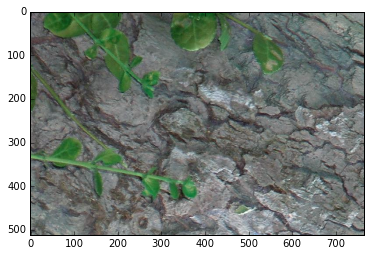

In [9]:
plt.imshow(bark1)

In [13]:
h = np.genfromtxt(os.path.join(ppm_img_path,'H1to4p'))

In [14]:
h

array([[ -2.03814185e-01,   3.51020127e-01,   2.47108521e+02],
       [ -3.49953183e-01,  -1.97548650e-01,   4.66545764e+02],
       [ -1.57357883e-05,   1.02429519e-05,   1.00000000e+00]])

In [15]:
bark4 = cv2.imread(os.path.join(ppm_img_path,'img4.ppm'))

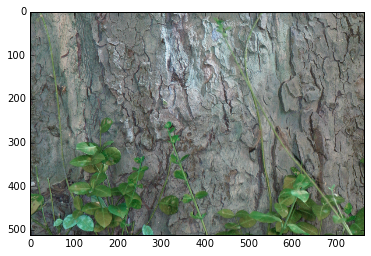

In [16]:
plt.imshow(bark4)

In [30]:
print(reversed(bark4.shape[:2]))

In [31]:
bark1_warped = cv2.warpPerspective(bark1,h,(bark4.shape[1],bark4.shape[0]))

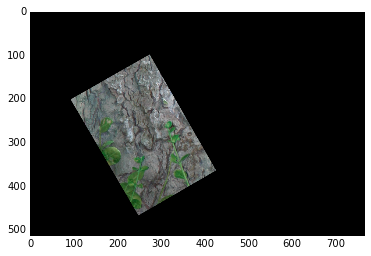

In [32]:
plt.imshow(bark1_warped)

In [33]:
h_inferred = np.array([[ -2.01209658e-01,   3.51733636e-01,   2.47425274e+02],
       [ -3.47558076e-01,  -1.96229647e-01,   4.67745874e+02],
       [  3.28250948e-08,   1.33357050e-05,   1.00000000e+00]])

In [35]:
bark1_warped2 = cv2.warpPerspective(bark1,h_inferred,(bark4.shape[1],bark4.shape[0]))

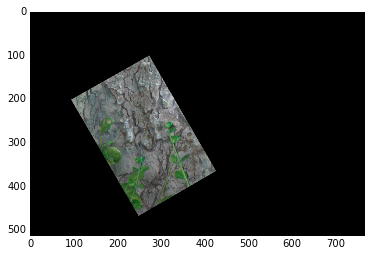

In [36]:
plt.imshow(bark1_warped2)